In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import docx2txt
import PyPDF2
import tika
import io
import os

In [98]:
table = pd.read_csv('pre_clean_text_680.csv', encoding = 'latin-1')

In [99]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            680 non-null    int64 
 1   index                 680 non-null    int64 
 2   ID                    680 non-null    int64 
 3   Gender                680 non-null    int64 
 4   Search term           680 non-null    object
 5   Current job role      680 non-null    object
 6   Desired job title     679 non-null    object
 7   Salary minimum        680 non-null    int64 
 8   Sal_goup              680 non-null    int64 
 9   County (; separated)  636 non-null    object
 10  Full_time             680 non-null    int64 
 11  part_time             680 non-null    int64 
 12  permanent             680 non-null    int64 
 13  temporary             680 non-null    int64 
 14  contract              680 non-null    int64 
 15  filename              680 non-null    ob

In [100]:
df_icm = table

In [101]:
df_icm['Salary minimum'].fillna(df_icm['Salary minimum'].median(), inplace = True)

In [102]:
df_icm['Salary minimum'].astype(int)

0      35000
1      26880
2      45000
3      20480
4      20000
       ...  
675    25000
676    19200
677    40000
678    23000
679    50000
Name: Salary minimum, Length: 680, dtype: int32

In [103]:
df_icm

,Unnamed: 0,index,ID,Gender,Search term,Current job role,Desired job title,Salary minimum,Sal_goup,County (; separated),Full_time,part_time,permanent,temporary,contract,filename,clean1
0,0,0,1001,1,aerospace,intern,propulsion test engineer,35000,2,london,1,1,1,0,0,1001.pdf,Education M.S. in Space and Astronautical Eng...
1,1,1,1002,0,mechancial,mechanical technician,tm operative,26880,1,cleveland,1,1,1,1,1,1002.docx,"PROFILE A timed served Mechanical Fitter, wit..."
2,2,2,1003,1,construction,commercial planning engineer,cost manager,45000,3,london,1,1,1,0,1,1003.pdf,MScConstructionCostManagementStudentatUniversi...
3,3,3,1004,0,renewable,renewable/sustainable energy engineer,renewable/sustainable energy engineer,20480,1,lanarkshire,1,1,1,1,1,1004.pdf,SUSTAINABLE ENERGY [MSC] - ELECTRICAL AND ELEC...
4,4,4,1005,0,robotics,robotics engineer,robotics engineer,20000,1,london,1,1,1,1,1,1005.pdf,"Skills SolidWorks (technical drawings, protot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,693,693,1694,0,robotics,structures intern,graduate technical consultant,25000,1,london,1,1,1,0,0,1694.docx,PROFILE Energetic and highly motivated aerospa...
676,694,694,1695,1,construction,civil engineer,civil engineer,19200,0,hampshire,1,1,1,1,1,1695.docx,"A highly qualified, experienced and dynamic pr..."
677,695,695,1696,0,construction,construction site manager,civil engineer,40000,3,gwynedd,1,1,1,0,0,1696.pdf,Innovative Construction Manager skilled in mot...
678,696,696,1697,1,rail,graduate engineer,graduate engineer,23000,1,NaN,1,1,1,1,1,1697.pdf,PROFILE I am an Engineering graduate looking f...


#### 3.1.3.1 Salaries and Gender

In [104]:
import scipy
from scipy.stats import ks_2samp
import numpy as np

In [106]:
df_icm_1 =df_icm[df_icm['Gender']==1]
df_icm_0 =df_icm[df_icm['Gender']==0]

In [107]:
df_icm_1['Salary minimum']

0       35000
2       45000
5       17000
8      100000
15      20000
        ...  
664     20000
671     32000
672     35000
676     19200
678     23000
Name: Salary minimum, Length: 339, dtype: int64

In [108]:
df_icm_1['Salary minimum'].describe()

count       339.000000
mean      37083.530973
std       18587.110968
min        4000.000000
25%       25000.000000
50%       33000.000000
75%       45000.000000
max      134400.000000
Name: Salary minimum, dtype: float64

In [109]:
df_icm_0['Salary minimum'].describe()

count       341.000000
mean      39398.527859
std       19754.509063
min        1000.000000
25%       26000.000000
50%       35000.000000
75%       45000.000000
max      150000.000000
Name: Salary minimum, dtype: float64

In [110]:
df_icm_1.shape

(339, 17)

In [111]:
ks_2samp(df_icm_1['Salary minimum'],df_icm_0['Salary minimum'])

KstestResult(statistic=0.0710300262112994, pvalue=0.3361280771515339)

In [92]:
scipy.stats.mannwhitneyu(df_icm_1['Salary minimum'],df_icm_0['Salary minimum'])

MannwhitneyuResult(statistic=57003.5, pvalue=0.07143519170620594)

C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


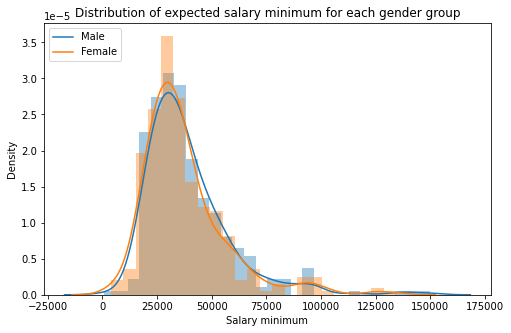

In [93]:
plt.figure(figsize=(8,5))
sns.distplot(df_icm_0["Salary minimum"])
sns.distplot(df_icm_1["Salary minimum"])
plt.title ('Distribution of expected salary minimum for each gender group')
plt.legend(['Male','Female'], loc='upper left')
plt.show()

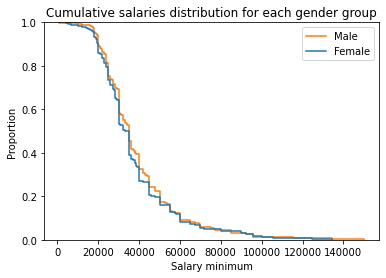

In [94]:
sns.ecdfplot(data=df_icm, x="Salary minimum", hue="Gender", complementary=True)
plt.title ('Cumulative salaries distribution for each gender group')
plt.legend(['Male','Female'], loc='upper right')
plt.show()

#### 3.1.3.5 Length of CVs

In [112]:
# file previous processed with excel
length = pd.read_csv('Len.csv')

In [113]:
length

,Female,Male
0,3001,4086.0
1,2637,4136.0
2,2052,3314.0
3,6457,13064.0
4,4437,3233.0
...,...,...
336,6618,3002.0
337,12816,4049.0
338,2711,3450.0
339,7793,NaN


C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lavin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


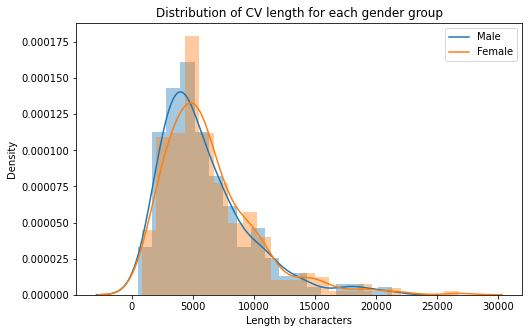

In [58]:
plt.figure(figsize=(8,5))
sns.distplot(length['Male'])
sns.distplot(length['Female'])
plt.title ('Distribution of CV length for each gender group')
plt.legend(['Male','Female'], loc='upper right')
plt.xlabel('Length by characters')
plt.show()

In [60]:
ks_2samp(length['Male'],length['Female'])

KstestResult(statistic=0.10557184750733138, pvalue=0.04464814289064687)

In [59]:
scipy.stats.mannwhitneyu(length['Male'],length['Female'])

MannwhitneyuResult(statistic=54421.5, pvalue=0.0741701009910105)

#### Catagorical variables

In [71]:
#load excel contingency table
book1 = pd.read_excel('Book1.xlsx', index_col=0)

In [69]:
from scipy.stats import chi2_contingency

In [72]:
#Gender vs contract
book1

,Full_time,part_time,permanent,temporary,contract,all
Female,262,262,297,96,125,339
Male,261,261,303,67,121,341


In [81]:
book1['none'] = book1['all']-book1['Full_time']
contingency= book1[['Full_time','none']]

In [84]:
chi2_contingency(contingency)


(0.01959552357664225,
 0.8886726226867782,
 1,
 array([[260.73088235,  78.26911765],
        [262.26911765,  78.73088235]]))

In [79]:
contingency= book1['Full_time']

In [86]:
#calculate Chi test 
for i in book1.columns[:5]:
    book1['none'] = book1['all']-book1[i]
    contingency= book1[[i,'none']]
    chi, p,dof, exp = chi2_contingency(contingency)
    print (i)
    print('test stat: ', chi)
    print('p value: ', p)


Full_time
test stat:  0.01959552357664225
p value:  0.8886726226867782
part_time
test stat:  0.01959552357664225
p value:  0.8886726226867782
permanent
test stat:  0.1482855964728646
p value:  0.7001791168032536
temporary
test stat:  6.544802593028705
p value:  0.010519099923100326
contract
test stat:  0.08830746345382025
p value:  0.7663399939943001


In [94]:
#Load excel contengency table  - search terms vs contract
book2 = pd.read_excel('Book2.xlsx', index_col=0)

In [95]:
book2

,Full_time,part_time,permanent,temporary,contract,all
term,,,,,,
construction,83,83,86,31,40,100
environmental,14,14,18,4,8,20
aerospace,75,75,92,21,30,100
automtive,40,40,41,16,20,50
digital,19,19,17,4,8,20
heat pump,37,37,43,6,13,49
logistics,22,22,45,9,12,49
mechancial,76,76,86,20,32,100
net zero and/or green,13,13,18,2,5,20


In [96]:
#Calculate Chi test score
for i in book2.columns[:5]:
    book2['none'] = book2['all']-book2[i]
    contingency= book2[[i,'none']]
    chi, p,dof, exp = chi2_contingency(contingency)
    print (i)
    print('test stat: ', chi)
    print('p value: ', p)


Full_time
test stat:  45.411875564276514
p value:  8.757989110005807e-06
part_time
test stat:  45.411875564276514
p value:  8.757989110005807e-06
permanent
test stat:  15.510256740247119
p value:  0.21471030650893916
temporary
test stat:  25.271058273432647
p value:  0.013589369938307247
contract
test stat:  26.502889387138406
p value:  0.009105142895909581
